# Imports and Constants

In [22]:
import csv
from pandas import DataFrame, read_csv
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets
from IPython.display import display, HTML
from textwrap import wrap
import numpy as np
from __future__ import print_function
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [2]:
output_file_path = "output.csv"
input_file_path = "Inpatient_Prospective_Payment_System__IPPS__Provider_Summary_for_the_Top_100_Diagnosis-Related_Groups__DRG__-_FY2011.csv"

In [3]:
drgDef = 'DRG Definition'
providerId = 'Provider Id'
providerName = 'Provider Name'
providerStreet = 'Provider Street Address'
providerCity= 'Provider City'
providerState = 'Provider State'
providerZip = 'Provider Zip Code'
hospRef = 'Hospital Referral Region Description'
totalDischarges = ' Total Discharges '
avgCovered = ' Average Covered Charges '
avgTotal = ' Average Total Payments '
avgMedicare = 'Average Medicare Payments'

## List of values

In [ ]:
drgDef_list = []
...

In [4]:
header_list = [drgDef, providerId, providerName, providerStreet, providerCity,providerState, 
               providerZip, hospRef, totalDischarges, avgCovered, avgTotal, avgMedicare]
varaible_list = [drgDef_list, ...]

In [6]:
dataSet = pd.read_csv(input_file_path, header=0)

# Data Refining

In [7]:
def refine_dataset(dataSet):
    """
        Prints type of each variable in the dataSet as well as the occurences of
        each unique value

        :param DataFrame dataSet: The DataFrame to refine
        :return: refined dataSet
        :rtype: DataFrame
    """
    #Drops rows with invalid number of variables
    dataSet.dropna(how='any')

    #Write updated dataset to file (For sake of testing comment this out, it's quite slow)
    dataSet.to_csv(output_file_path);

    return dataSet

dataSet = refine_dataset(dataSet)

# Basic Data Analysis

In [8]:
def descriptive_analysis(dataSet):
    """
        Prints the number of records in a dataSet
        the type of each varaible
        and the occurrences of each unique value
        
        :param DataFrame dataSet: The DataFrame to print stats for
    """
    
    print("\nNumber of records: " + str(len(dataSet)) + "\n")
    
    #Seems janky but does the job,
    #removes person from list (Does not have any effect on given dataSet)
    for headerName in dataSet:
        # Get group for current header
        group = dataSet.groupby(headerName)

        # Print number of occurrences of each variable
        print(group.size())
        print("\n")

descriptive_analysis(dataSet)


Number of records: 163065

DRG Definition
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC                                      1079
057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC                           1201
064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC                    1659
065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC                     2269
066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC               1806
069 - TRANSIENT ISCHEMIA                                                      1962
074 - CRANIAL & PERIPHERAL NERVE DISORDERS W/O MCC                             979
101 - SEIZURES W/O MCC                                                        1593
149 - DYSEQUILIBRIUM                                                           988
176 - PULMONARY EMBOLISM W/O MCC                                              1396
177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W MCC                            1894
178 - RESPIRATORY INFECTIONS & INFLAMMATIONS

# Data Plotting Methods

In [13]:
# ensures plot will be shown in the jupyter notebook
%matplotlib notebook 

def plot_distribution_by_header(dataSet, header, plt_type, title, axis, *args):
    """
        Takes dataSet and then plots the distribution of given header

        :param DataFrame dataSet: The DataFrame to be plotted
        :param String header:     The header to plot
        :param String plt_type:   The type of plot (eg. "pie", "bar", etc)
        :param String title:      The plot title
        :param Axis axis:         The matplotlib axis to use
        :param *args              - each arg should be a touple of (filter_name, [filter_selection])
    """
    hd = str(header)
    pt = str(plt_type)
    tt = '\n'.join(wrap(str(title), 100))   # wrap long titles
    
    # filter dataset with filters provided in args
    for arg in args:
        dataSet = (dataSet[dataSet[arg[0]].isin(arg[1])])    
    
    # plot dataset and do per plot-type formatting
    if(pt == "pie"):
        dataSet[hd].value_counts().plot(ax=axis, kind=pt, autopct='%1.0f%%', pctdistance=0.8)
                                            # plots with % labels on pie chart slices
        axis.axis('equal')                  # Equal aspect ratio ensures that pie is drawn as a circle.
        axis.axis('off')                    # switches axis labels off
    if(pt == "bar") :
        
        dataSet[hd].value_counts().plot(ax=axis, kind=pt)
        axis.axis('auto')                   # resets axis labels back to auto
        axis.axis('on')
        plt.xticks(rotation=65, ha='right') # sets rotation and offset
        axis.set_xlabel(hd)
        axis.set_ylabel("Number of Records")
    if(pt == "hist"):
        n, bins, patches = plt.hist(dataSet[hd].value_counts(), 50, normed=1, facecolor='green', alpha=0.75)
    
    # adding padding beneath the plot title
    plt.title(tt, y=1.06)
    
    # wrapping of long axis labels
    oldXLabels = [ x.get_text() for x in axis.get_xticklabels() ]
    xLabels = [ '\n'.join(wrap(l, 30)) for l in oldXLabels ]
    axis.set_xticklabels(xLabels)
    
    #plt.tight_layout()
    
    # saving figure to file - all spaces replaced with '_'
    plt.savefig('Visualisations/' + title.replace(" ", "_") + '.png', bbox_inches='tight')
    
    # show plot in notebook
    plt.show()

Plot pie chart of distribution by a given header name

In [9]:
def plot_pie_distribution_by_header(dataSet, header):
    """
        Takes dataSet and plots distribution of given header

        :param DataFrame dataSet: The DataFrame to be plotted
    """
    %matplotlib notebook

    fig, axis = plt.subplots()
    
    title = "Distribution of " + header
    
    dataSet[header].value_counts().plot(ax=axis, kind='pie')
    plt.ylabel("")
    #plt.tight_layout()
    plt.title(title, y=1.02)
    axis.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.savefig('Visualisations/distribution.png')
    plt.show()

Plot bar graph of distribution by a given header name

In [10]:
def plot_bar_distribution_by_header(dataSet, header):
    """
        Takes dataSet and plots distribution of given header

        :param DataFrame dataSet: The DataFrame to be plotted
    """
    %matplotlib notebook

    fig, axis = plt.subplots()
    
    title = "Distribution of " + header
    
    filename = 'Visualisations/distribution_of_' + header.replace(" ", "_") + '.png'
    
    dataSet[header].value_counts().plot(ax=axis, kind='bar')
    plt.ylabel("")
    #plt.tight_layout()
    plt.title(title, y=1.02)  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.savefig(filename)
    plt.show()

# Data Analysis Execution

In [11]:
dataSet = pd.read_csv(input_file_path, header=0)

<IPython.core.display.Javascript object>


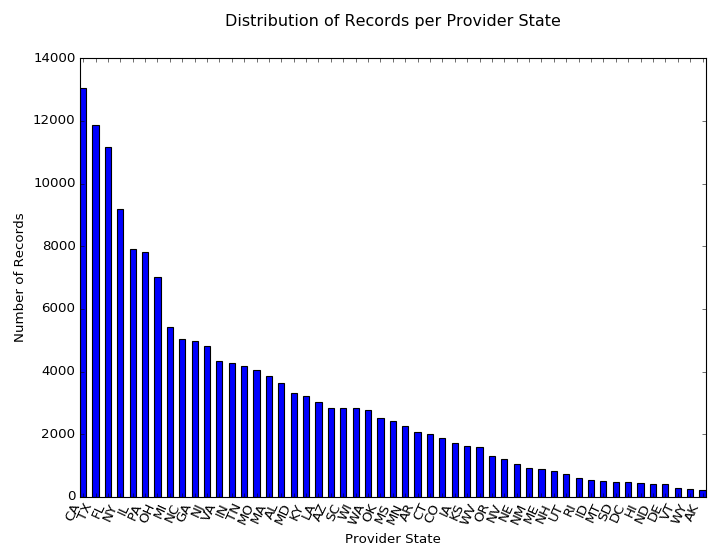

/usr/lib64/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [14]:
fig, axis = plt.subplots(figsize=(9, 7))
plot_distribution_by_header(dataSet, providerState, 'bar', "Distribution of Records per Provider State", axis)

<IPython.core.display.Javascript object>


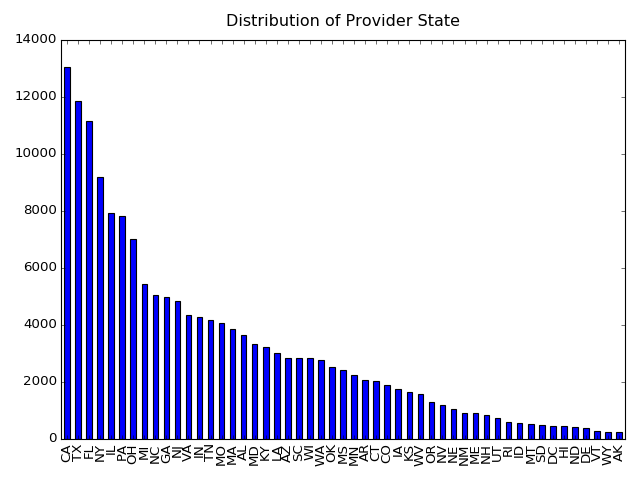

In [12]:
plot_bar_distribution_by_header(dataSet, providerState)

<IPython.core.display.Javascript object>


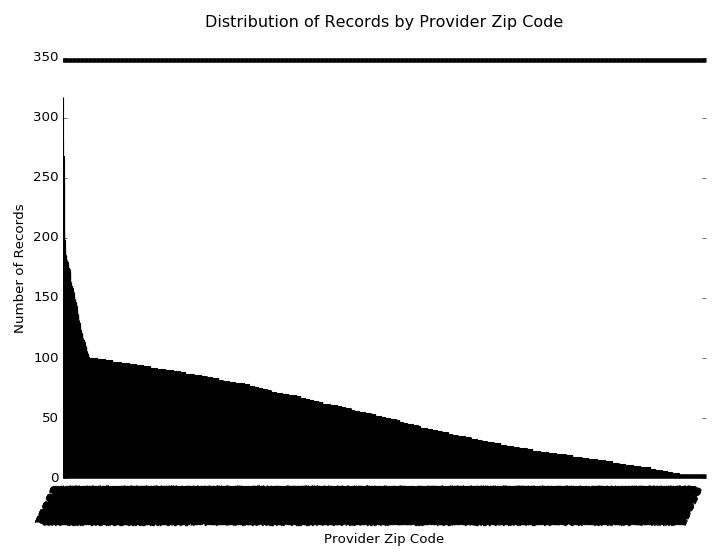

/usr/lib64/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


NameError: name 'variable_list_readable' is not defined

In [24]:
fig, axis = plt.subplots(figsize=(9, 7))

# lists storing filter widgets
filter_boxes = []
filter_selector_widgets = []
value_selector_widgets = []

def makeTitle(header, *args):
    """
        Function makes a human readable title from the header and filters provided. 
        Format:
            "Distribution of Records by <header> (for the <header> [<value>, ...] (and 
                the <header> [<value>, ...]), ...)
    """
    ret = "Distribution of Records by " + header
    a = 0
    for arg in args:
        i = header_list.index(arg[0])
        allValues = variable_list_readable[i]
        if(len(arg[1]) > 0 and len(arg[1]) < len(allValues)):
            if(a>0):
                ret += " and"
            else:
                ret += " for"
        if((len(arg[1]) > 1) and (len(arg[1]) < len(allValues))):
            ret += " the " + arg[0] + "[s] "
            i = 0
            for item in arg[1]:
                if(i>0):
                    ret+= ","
                ret += " '" + item + "'"
                i += 1
        elif(len(arg[1]) == 1):
            ret += " the " + arg[0] + " '" + arg[1][0] + "'"
        a += 1
    return ret

def update(b):
    """
        Called when "Update" is clicked. Clears previous and draws new plot. 
        Calls plot_distribution_by_header() with user selection.
    """
    axis.clear()
    filters = []
    for (f,s) in zip(filter_selector_widgets, value_selector_widgets):
        filters.append((f.value, s.value))
    plt_title = makeTitle(headerSelector.value, *filters);
    plot_distribution_by_header(dataSet, headerSelector.value, pltSelector.value, plt_title, axis, *filters)

def removeFilter(b):
    """
        Called when "Remove Filter" is clicked. Tries to remove the last 
        set of filters in the lists.
    """
    try:
        filter_selector_widgets[-1].close()
        del filter_selector_widgets[-1]
        value_selector_widgets[-1].close()
        del value_selector_widgets[-1]
        filter_boxes[-1].close()
        del filter_boxes[-1]
    except:
        pass
    
def addFilter(b):
    """
        Called when "Add Filter" is clicked. Adds 2 new Selectors to the Controls.
    """
    
    # selector widget to chose header
    filter_selector_widget = widgets.Select(
        options=header_list,
        value=header_list[0],
        description='Header to filter:')
    
    # multi-selector widget to chose values
    value_selector_widget = widgets.SelectMultiple(
        options=variable_list[0],
        value=[variable_list[0][0]],
        description='Filter:')
    
    # handler function which updates the value_selector_widget
    def handle_chose(sender):
        """
            Called when a value in filter_selector_widget is clicked. Updates the 
            value_selector_widget.
        """
        i = header_list.index(filter_selector_widget.value)
        value_selector_widget.options=variable_list_readable[i]
        value_selector_widget.value=[variable_list_readable[i][0]]
    
    # register handler function
    filter_selector_widget.observe(handle_chose, names='value')
    
    # make vertival box for formatting
    filterControls = widgets.VBox([filter_selector_widget, value_selector_widget])
    
    # add widgets to list of all widgets
    filter_selector_widgets.append(filter_selector_widget)
    value_selector_widgets.append(value_selector_widget)
    filter_boxes.append(filterControls)

    # make new submit button and remove old ones
    global submit_new
    try:
        submit_new.close()
        submit.close()
        submitControl.close()
        submitControl_new.close()
    except:
        pass
    
    submit_new = widgets.Button(description="Update")
    submit_new.style.button_color = 'rosybrown'
    submit_new.on_click(update)
    submitControl_new = widgets.HBox([submit_new])
    display(filterControls, submitControl_new)

# control title
caption = widgets.Label(
    value='Interactive Plot Creator:',
    layout=Layout(width='160px'))

# plot type selector
pltSelector = widgets.Select(
    options=["pie", "bar", "hist"],
    value="pie",
    description='Plot Type:')

# header selector
headerSelector = widgets.Select(
    options=header_list,
    value=header_list[0],
    layout=Layout(color='#000000'),
    description='What to plot:')

pltControls = widgets.VBox([caption, pltSelector, headerSelector])

# 'add filter' button
addFilterButton = widgets.Button(description="Add Filter")
addFilterButton.style.button_color = 'forestgreen'
addFilterButton.on_click(addFilter)

# 'remove filter' button
removeFilterButton = widgets.Button(description="Remove Filter")
removeFilterButton.style.button_color = 'red'
removeFilterButton.on_click(removeFilter)
filterControls = widgets.HBox([addFilterButton, removeFilterButton])

# 'submit' button
submit = widgets.Button(description="Update")
submit.style.button_color = 'rosybrown'
submit.on_click(update)
submitControl = widgets.HBox([submit])

# display widgets
display(pltControls, filterControls, submitControl)